In [2]:
# Print out WSL shell environment vars passed to jupyter notebook
ENV
# ENV["BROWSER"]

Base.EnvDict with 28 entries:
  "SHELL"              => "/bin/bash"
  "WSL_DISTRO_NAME"    => "Ubuntu"
  "WT_SESSION"         => "4193049c-1c4b-4df6-89f1-1f2ce76bba36"
  "NAME"               => "DESKTOP-A1AUCQ6"
  "PWD"                => "/home/kkganko/oscillatory_bioreactor"
  "LOGNAME"            => "kkganko"
  "HOME"               => "/home/kkganko"
  "LANG"               => "C.UTF-8"
  "WSL_INTEROP"        => "/run/WSL/972_interop"
  "LS_COLORS"          => "rs=0:di=01;34:ln=01;36:mh=00:pi=40;33:so=01;35:do=01…
  "LESSCLOSE"          => "/usr/bin/lesspipe %s %s"
  "TERM"               => "xterm-256color"
  "LESSOPEN"           => "| /usr/bin/lesspipe %s"
  "USER"               => "kkganko"
  "SHLVL"              => "1"
  "DOCKER_ARCH"        => "amd64"
  "WSLENV"             => "WT_SESSION::WT_PROFILE_ID"
  "XDG_DATA_DIRS"      => "/usr/local/share:/usr/share:/var/lib/snapd/desktop"
  "BROWSER"            => "/mnt/c/Program Files (x86)/Microsoft/Edge/Applicatio…
  "PATH"           

In [3]:
import Pkg

In [4]:
# Pkg.add("IJulia")
# Pkg.add("Conda")
# Pkg.add("PyCall")
# Pkg.add("Plots")
# Pkg.add("PyPlot")
# Pkg.add("JLD") # for loading and saving Julia variables using .jld file format
# Pkg.add("LaTeXStrings") # for using latex math fonts in plots, prepend L to strings, ie. L"5+5"
# Pkg.add("SpecialFunctions") # for getting Beta function and error function + complementary error function values given inputs
# Pkg.add("BenchmarkTools") # for performance tracking, https://github.com/JuliaCI/BenchmarkTools.jl

using Printf # for pretty string formatting of variables
using Random # for setting random seeds
using IJulia
using Conda
using PyCall
using Plots
using Plots; pyplot(html_output_format=:png)
using JLD
using LaTeXStrings
using SpecialFunctions
using LinearAlgebra # holds LowerTriangular() matrix generator plus other nifty Linpack routines
using BenchmarkTools

In [5]:
Conda.list()

┌ Info: Running `conda list` in root environment
└ @ Conda /home/kkganko/.julia/packages/Conda/x2UxR/src/Conda.jl:127


# packages in environment at /home/kkganko/.julia/conda/3:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
anyio                     3.6.1              pyhd8ed1ab_1    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0           py39hb9d737c_2    conda-forge
asttokens                 2.0.8              pyhd8ed1ab_0    conda-forge
attrs                     22.1.0             pyh71513ae_1    conda-forge
babel                     2.10.3             pyhd8ed1ab_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-forge
backports.functools_lru_cache 1.6.4              pyhd8ed1ab_0    conda-forge
beautifulsoup4            4.11.1             pyha770c72_0    cond

1×3 Matrix{String}:
 "hi"  "hi"  "hi"

0.07
$5+5$
$\mathrm{My\, \alpha\, including\, a\, variable\, date:\,}07-08-2018$


L"$\textrm{My date is } 07-08-2018$"

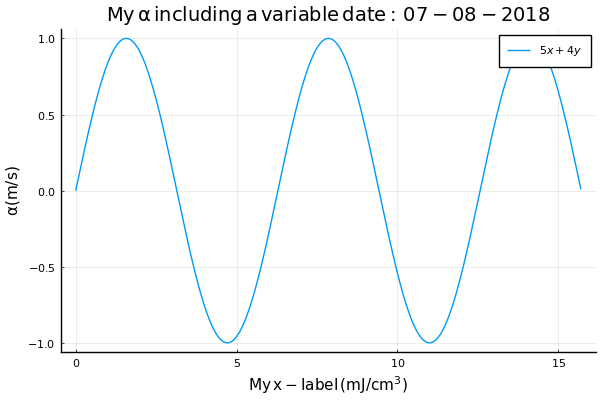

In [6]:
# Test if normal commands are working in this notebook
display("text/plain", ["hi" "hi" "hi"])
Random.seed!(1) # set random seed for runs going forward
testtest = rand() # should be reproducible random number at this point
actual_label = "$(@sprintf("%.2f", testtest))" # pretty formatting
println(actual_label)

# Test if Latex is working fine, can either prepend L to strings or use latexstring function (PREFERRED).
# NOT WORKING IN GR()! See more discussion about issues with gr() backend at 
# https://discourse.julialang.org/t/latex-code-for-titles-labels-with-plots-jl/1967/17
println(L"5+5")
date = "07-08-2018"
titlestring = latexstring("\\mathrm{My\\, \\alpha\\, including\\, a\\, variable\\, date:\\,}", date)
println(titlestring)
display(L"\textrm{My date is } %$(date)")
plot(sin, (0:0.01:5*pi), title = titlestring, xlabel = L"\mathrm{My\, x-label\, (mJ/cm^{3})}", 
    ylabel = L"\mathrm{\alpha (m/s)}", label = latexstring("5x+4y"))

# Testing PyClaw Usage through PyCall #

In [7]:
# # need to set to empty string to force Julia installation to use own mini Python distribution
# ENV["PYTHON"]=""
# ENV
# Pkg.build("PyCall")
println("Conda.jl takes packages from $(Conda.ROOTENV)")
println("PyCall uses python at $(Conda.PYTHONDIR)")
println("More precisely PyCall runs using packages at $(PyCall.pyprogramname)")
# list packages the Conda.jl installed
Conda.list(Conda.ROOTENV)

Conda.jl takes packages from /home/kkganko/.julia/conda/3
PyCall uses python at /home/kkganko/.julia/conda/3/bin
More precisely PyCall runs using packages at /home/kkganko/.julia/conda/3/bin/python


┌ Info: Running `conda list` in root environment
└ @ Conda /home/kkganko/.julia/packages/Conda/x2UxR/src/Conda.jl:127


# packages in environment at /home/kkganko/.julia/conda/3:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
anyio                     3.6.1              pyhd8ed1ab_1    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0           py39hb9d737c_2    conda-forge
asttokens                 2.0.8              pyhd8ed1ab_0    conda-forge
attrs                     22.1.0             pyh71513ae_1    conda-forge
babel                     2.10.3             pyhd8ed1ab_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-forge
backports.functools_lru_cache 1.6.4              pyhd8ed1ab_0    conda-forge
beautifulsoup4            4.11.1             pyha770c72_0    cond

In [8]:
# only need to run once
# Conda.add("clawpack")

# How does PyClaw work? #

First of all, **read the damn documentation, then go looking at the code** (instead of the other way around).

1. You have whole clawpack ecosystem directory downloaded in conda packages directory private to Julia. PyClaw is just one directory.

2. Navigate to some examples file in PyClaw directory. Each example illustrates a different concept or way of posing a problem.

3. Example files are python files. You can import the .py file using PyCall and run the various defined functions within it.

4. For example.py files, almost always the setup() function returns a "claw" Controller-type object with a "setplot" attribute/field which is a function handling plotting arguments.

5. For how to extract info from Controller object at each timeframe in solution, see https://www.clawpack.org/pyclaw/output.html

6. You are saving this info into the FastAcc-HypNumSolver folder.

In [9]:
# Initially got error that some version `GLIBCXX_3.4.30` not found
# https://stackoverflow.com/questions/44773296/libstdc-so-6-version-glibcxx-3-4-20-not-found
# https://github.com/JuliaPy/PyCall.jl/issues/999
# https://github.com/JuliaPy/PyPlot.jl/issues/469
py"""
from clawpack.pyclaw import examples
claw = examples.acoustics_1d.setup()
claw.run()
# print(type(claw))
# print(type(claw.setplot))
# help(claw.plot)
# print(claw.frames[0].q)
print(claw) # looks at __str__ definition
"""

2023-03-01 21:49:43,480 INFO CLAW: Solution 0 computed for time t=0.000000
hi this is me
2023-03-01 21:49:43,481 INFO CLAW: Solution 1 computed for time t=0.100000
hi this is me
2023-03-01 21:49:43,482 INFO CLAW: Solution 2 computed for time t=0.200000
hi this is me
2023-03-01 21:49:43,484 INFO CLAW: Solution 3 computed for time t=0.300000
hi this is me
2023-03-01 21:49:43,485 INFO CLAW: Solution 4 computed for time t=0.400000
hi this is me
2023-03-01 21:49:43,487 INFO CLAW: Solution 5 computed for time t=0.500000
hi this is me
2023-03-01 21:49:43,489 INFO CLAW: Solution 6 computed for time t=0.600000
hi this is me
2023-03-01 21:49:43,490 INFO CLAW: Solution 7 computed for time t=0.700000
hi this is me
2023-03-01 21:49:43,492 INFO CLAW: Solution 8 computed for time t=0.800000
hi this is me
2023-03-01 21:49:43,493 INFO CLAW: Solution 9 computed for time t=0.900000
hi this is me
2023-03-01 21:49:43,495 INFO CLAW: Solution 10 computed for time t=1.000000
Controller attributes:
  xdir = /h

# Run PyClaw examples from python files in WSL Ubuntu distro command line and view them in Chrome browser # 

1. `cd-pyclaw-dir` followed by `cd ./examples/<example_name>/`
2. `julia-python <example_name>.py htmlplot=1` followed by `cd ./_plots/`
3. `explorer.exe _PlotIndex.html` will open in Chrome through WSL shell (be sure NOT to use any path to the file, explorer.exe will not parse it correctly and will instead open Windows Explorer window...)

2023-03-01 21:50:29,469 INFO CLAW: Solution 0 computed for time t=0.000000
hi this is me
2023-03-01 21:50:29,471 INFO CLAW: Solution 1 computed for time t=0.100000
hi this is me
2023-03-01 21:50:29,473 INFO CLAW: Solution 2 computed for time t=0.200000
hi this is me
2023-03-01 21:50:29,475 INFO CLAW: Solution 3 computed for time t=0.300000
hi this is me
2023-03-01 21:50:29,477 INFO CLAW: Solution 4 computed for time t=0.400000
hi this is me
2023-03-01 21:50:29,480 INFO CLAW: Solution 5 computed for time t=0.500000
hi this is me
2023-03-01 21:50:29,483 INFO CLAW: Solution 6 computed for time t=0.600000
hi this is me
2023-03-01 21:50:29,486 INFO CLAW: Solution 7 computed for time t=0.700000
hi this is me
2023-03-01 21:50:29,489 INFO CLAW: Solution 8 computed for time t=0.800000
hi this is me
2023-03-01 21:50:29,491 INFO CLAW: Solution 9 computed for time t=0.900000
hi this is me
2023-03-01 21:50:29,494 INFO CLAW: Solution 10 computed for time t=1.000000


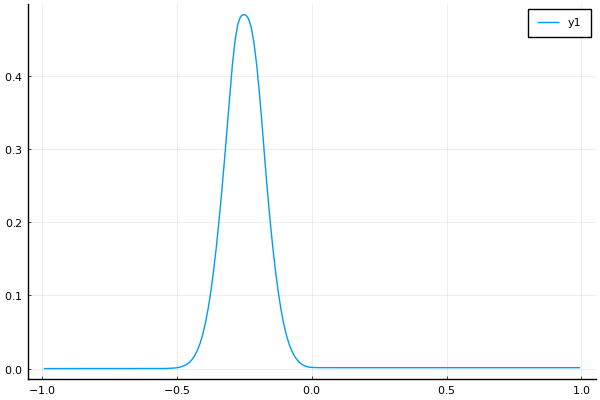

In [10]:
# Solve acoustics equations
# http://www.clawpack.org/pyclaw/tutorial.html#pyclaw-tutorial
py"""
# solver
from clawpack import pyclaw
from clawpack import riemann
solver = pyclaw.ClawSolver1D(riemann.acoustics_1D)
solver.bc_lower[0] = pyclaw.BC.wall
solver.bc_upper[0] = pyclaw.BC.extrap

# domain
domain = pyclaw.Domain([-1.0], [1.0], [200])
solution = pyclaw.Solution(solver.num_eqn, domain)

# initial condition
state = solution.state
xc = state.grid.p_centers[0]

from numpy import exp
state.q[0,:] = exp(-100 * (xc-0.75)**2)
state.q[1,:] = 0.

# parameters
from math import sqrt
rho = 1.0
bulk = 1.0
state.problem_data['rho'] = rho
state.problem_data['bulk'] = bulk
state.problem_data['zz'] = sqrt(rho*bulk)
state.problem_data['cc'] = sqrt(bulk/rho)

# Controller
controller = pyclaw.Controller()
controller.solution = solution
controller.solver = solver
controller.tfinal = 1.0
controller.keep_copy = True

# run
status = controller.run()

# plot NOT WORKING!!
from clawpack.pyclaw import plot
# plot.plot() 
"""

# Just use Julia to plot the desired plots
centers = py"controller.centers"
results = py"controller.frames"
plot(centers,results[end].q[1,:])

In [11]:
py"""
print(controller)
"""

Controller attributes:
  xdir = /home/kkganko/oscillatory_bioreactor 
  rundir = /home/kkganko/oscillatory_bioreactor 
  outdir = /home/kkganko/oscillatory_bioreactor/_output 
  overwrite = True 
  xclawcmd = xclaw 
  xclawout = None 
  xclawerr = None 
  runmake = False 
  savecode = False 
  solver = Solver Status:

                   cflmax = 0.9000000000000001
                    dtmin = 0.009
                    dtmax = 0.009000000000000001
                 numsteps = 120 
  keep_copy = True 
  write_aux_init = False 
  write_aux_always = False 
  output_format = ascii 
  output_file_prefix = None 
  output_options = {} 
  num_output_times = 10 
  output_style = 1 
  verbosity = 3 

  Solver Solver Status:

                   cflmax = 0.9000000000000001
                    dtmin = 0.009
                    dtmax = 0.009000000000000001
                 numsteps = 120
  Frames 
    states:
PyClaw State object
Patch dimensions: [200]
Time  t=0.0
Number of conserved quantities: 2
prob